# Poisson Distribution

In [24]:
##IMPORTING LIBRARIES
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


import warnings
warnings.filterwarnings('ignore')


from scipy.stats import poisson
import math

from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

In [25]:
# importing file with data
df_f = pd.read_csv("FINAL.csv")
df_f.head()

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
0,2011,Border,784000.0,517440.0,66.0
1,2011,Dublin,2523000.0,2119320.0,84.0
2,2011,Ireland,9149700.0,7136766.0,78.0
3,2011,Mid-East,1314900.0,1143963.0,87.0
4,2011,Mid-West,933600.0,718872.0,77.0


In [26]:
df_f.describe()

,Year,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
count,108.000000,1.080000e+02,1.080000e+02,108.000000
mean,2016.500000,2.140712e+06,1.866451e+06,86.027778
std,3.468146,2.729605e+06,2.400130e+06,5.897819
min,2011.000000,5.676000e+05,4.248340e+05,66.000000
25%,2013.750000,8.333750e+05,6.981822e+05,82.000000
50%,2016.500000,9.668000e+05,8.586830e+05,87.000000
75%,2019.250000,1.488175e+06,1.387739e+06,90.062500
max,2022.000000,1.036790e+07,9.745826e+06,97.000000


In [27]:
unique_region_names = set(df_f['Region'])
years_to_predict = [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033]
unique_region_names

{'Border',
 'Dublin',
 'Ireland',
 'Mid-East',
 'Mid-West',
 'Midlands',
 'South-East',
 'South-West',
 'West'}

In [28]:
# creating function when expected increase is equal to average increase for the same amount of ears
def p_steady_increase (avg_in_year,year):
    coef = year - last_year
    k = avg_in_year*coef
    steady_increase = round((poisson.pmf(k, k)*100),3)
    return steady_increase

# creating function when expected increase is higher than average yearly increase for the same amount of ears
def p_sudden_spike (avg_in_year,year):
    coef = year - last_year
    k = avg_in_year*coef
    sudden_spike = round((poisson.sf(k, k)*100),3)
    return sudden_spike

# creating function when expected increase is lower then average yearly increase for the same amount of ears
def p_of_decline (avg_in_year,year):
    coef = year - last_year # number of years to predict
    k = avg_in_year*coef
    decline = round((poisson.cdf(k, k)*100),3)
    return decline

In [29]:
# In my case k = mu as mean number of events (mu) is equal to 1 for giving period of time.

In [30]:
data=[]
last_year = 2022 #year where we start calculation
for region in unique_region_names:
    df = df_f.drop(df_f[(df_f["Region"] != region) ].index)
    
    #calculating mean value, i.e. average nr of people connecting to internet early
    avg_in_year = round((df['Nr of Persons with Internet Access'].iloc[-1] - 
                     df['Nr of Persons with Internet Access'].iloc[0])/len(df['Nr of Persons with Internet Access']))
#calling our fuctions for each pair of region and year
    for year in years_to_predict:
        si = p_steady_increase (avg_in_year,year) 
        ss = p_sudden_spike (avg_in_year,year)
        pod = p_of_decline (avg_in_year,year)
        row = [year, region, si, ss , pod]
        data.append(row)

In [31]:
#pulling data into data frame
Poisson_prob = pd.DataFrame(data, columns=['Year', 'Region','Probability of Steady Increase',
                                           'Probability of Sudden Spike','Probability of Decline'])
Poisson_prob.head()

,Year,Region,Probability of Steady Increase,Probability of Sudden Spike,Probability of Decline
0,2023,Border,0.281,49.813,50.187
1,2024,Border,0.198,49.868,50.132
2,2025,Border,0.162,49.892,50.108
3,2026,Border,0.140,49.906,50.094
4,2027,Border,0.125,49.916,50.084


In [32]:
#Visualising results

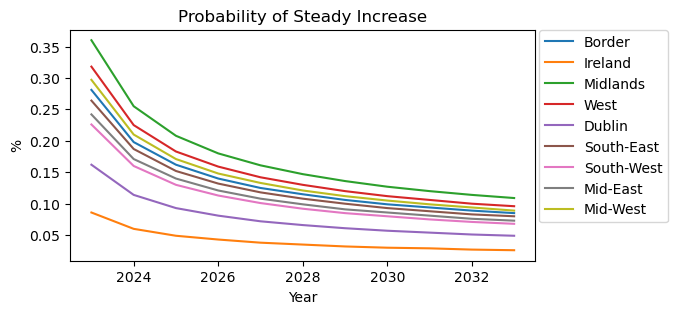

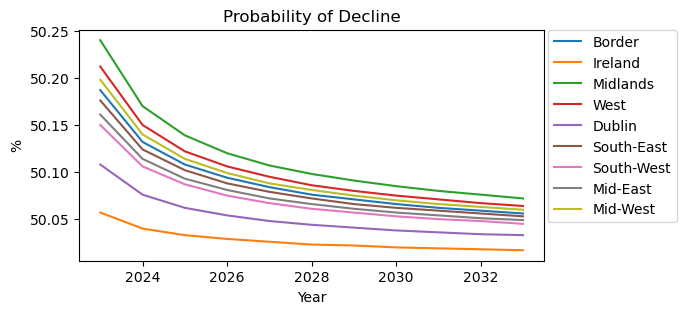

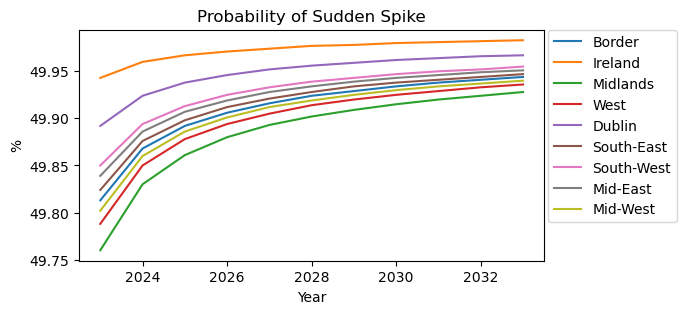

In [33]:
plt.figure(figsize=(6, 3))
for region in unique_region_names:
    df_region = Poisson_prob[Poisson_prob['Region'] == region]
    plt.plot(df_region['Year'], df_region['Probability of Steady Increase'], label=region)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    plt.title('Probability of Steady Increase')
    plt.xlabel("Year")
    plt.ylabel("%")
    
plt.figure(figsize=(6, 3))
for region in unique_region_names:
    df_region = Poisson_prob[Poisson_prob['Region'] == region]
    plt.plot(df_region['Year'], df_region['Probability of Decline'], label=region)
    plt.title('Probability of Decline')
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    plt.xlabel("Year")
    plt.ylabel("%")
    
plt.figure(figsize=(6, 3))
for region in unique_region_names:
    df_region = Poisson_prob[Poisson_prob['Region'] == region]
    plt.plot(df_region['Year'], df_region['Probability of Sudden Spike'], label=region)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    plt.title('Probability of Sudden Spike')
    plt.xlabel("Year")
    plt.ylabel("%")